<a href="https://colab.research.google.com/github/DanielDialektico/Machine-Learning/blob/main/Preprocesamiento/Preprocesamiento_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

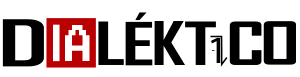

**INTRODUCCI√ìN AL PREPROCESAMIENTO DE DATOS CON PYTHON** ‚öí



# 1. Introducci√≥n
El fin de esta pr√°ctica es darte un recorrido en el que observar√°s c√≥mo se **preprocesa** un conjunto de datos con algunas librer√≠as de **Python** (principalmente **Pandas**, la cual nos permite trabajar de forma sencilla con informaci√≥n dispuesta en tablas), con la pretensi√≥n de que experimentes las distintas etapas de edici√≥n por las que puede pasar un conjunto de datos antes de llegar a alimentar un modelo de **machine learning**. 

Ejecutar√°s c√≥digo que te ayude a **limpiar** y **transformar** un conjunto de datos para generar uno m√°s comprensible y digerible para la m√°quina, y/o para quien lo manipule y analice. 

**Nota**: dado que las t√©cnicas de **reducci√≥n** de datos como el **PCA** suelen requerir de mayor abordaje te√≥rico, en este caso haremos preprocesamiento atendiendo a los enfoques de **limpieza** y **transformaci√≥n** descritos en nuestra exploraci√≥n, los cuales en muchas ocasiones son m√°s que suficientes para preparar los datos.

# 2. Objetivo
Para esta pr√°ctica, se plantea la siguiente problem√°tica: 

Se nos ha dado la tarea de **analizar** un conjunto de datos de autom√≥viles para hallar **insights** (descubrimientos relevantes), y posteriormente crear un modelo de **machine learning**. Sin embargo, sabemos que antes debemos de ejecutar una etapa de **preprocesamiento** para llevar a cabo estas tareas de manera eficiente.

Nuestro objetivo ser√° la ejecuci√≥n de esta etapa previa, realizando los cambios necesarios a la informaci√≥n provista.

El conjunto de datos a trabajar es una tabla con **256 ejemplos de entrenamiento**, los cuales contienen **26 caracter√≠sticas** de cada coche.

Para completar nuestra tarea, el equipo de marketing nos ha pedido que solo utilicemos los siguientes **atributos** (columnas): tipo de motor, n√∫mero de cilindros, sistema de combustible, caballos de fuerza, y precio.

**Nota**: el conjunto de datos que utilizaremos comprende **informaci√≥n real** de acceso p√∫blico. Para m√°s informaci√≥n cons√∫ltese el **ap√©ndice** al final de la lecci√≥n.

# 3. Declaraci√≥n de librer√≠as y carga de datos
Para cargar  el conjunto de datos a nuestro espacio de trabajo, se leer√° un CSV alojado en un repositorio de **GitHub**, el cual se extrar√° utilizando la URL del archivo, y se almacenar√° en una **tabla** (dataFrame) utilizando la librer√≠a **Pandas**. 

La declaraci√≥n de las **librer√≠as** a utilizar se encuentra al principio del c√≥digo. 

**Nota**: Recuerda que para ejecutar las celdas de c√≥digo solo debes colocarte sobre estas y presionar Shift + Enter, u oprimir el **bot√≥n de reproducci√≥n**.

Ejecuta la siguiente celda para cargar los datos y las librer√≠as, y de ahora en adelante, haz lo mismo con todos los bloques conforme vayan apareciendo:

In [ ]:
#Se importan las librer√≠as.
import pandas as pd
import sklearn
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

#Se define el tipo de formato de las gr√°ficas.
plt.style.use('seaborn-v0_8-whitegrid')

#Se ignoran las alertas.
warnings.filterwarnings('ignore')

#Se carga el conjunto de datos desde GitHub
dataset = pd.read_csv('https://raw.githubusercontent.com/DanielDialektico/Machine-Learning/main/Conjuntos%20de%20datos/Autom%C3%B3viles.csv')

Comprobamos que la carga se haya realizado correctamente mostrando los primeros cinco renglones de la tabla:

In [ ]:
#Se especifica que se muestren todas las columnas de la tabla.
pd.set_option('display.max_columns', None)

#Se imprimen los primeros cinco renglones.
dataset.head()

symboling  normalized-losses         make  fuel-type aspiration  \
0          3                NaN  alfa-romero        gas        std   
1          3                NaN  alfa-romero        gas        std   
2          1                NaN  alfa-romero        gas        std   
3          2              164.0         audi        gas        std   
4          2              164.0         audi        gas        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  length  \
0          two  convertible          rwd           front        88.6   168.8   
1          two  convertible          rwd           front        88.6   168.8   
2          two    hatchback          rwd           front        94.5   171.2   
3         four        sedan          fwd           front        99.8   176.6   
4         four        sedan          4wd           front        99.4   176.6   

   width  height  curb-weight engine-type num-of-cylinders  engine-size  \
0   64.1    48.8         2548        dohc             four          130   
1   64.1    48.8         2548        dohc             four          130   
2   65.5    52.4         2823        ohcv              six          152   
3   66.2    54.3         2337         ohc             four          109   
4   66.4    54.3         2824         ohc             five          136   

  fuel-system  bore  stroke  compression-ratio  horsepower  peak-rpm  \
0        mpfi  3.47    2.68                9.0       111.0    5000.0   
1        mpfi  3.47    2.68                9.0       111.0    5000.0   
2        mpfi  2.68    3.47                9.0       154.0    5000.0   
3        mpfi  3.19    3.40               10.0       102.0    5500.0   
4        mpfi  3.19    3.40                8.0       115.0    5500.0   

   city-mpg  highway-mpg    price  
0        21           27  13495.0  
1        21           27  16500.0  
2        19           26  16500.0  
3        24           30  13950.0  
4        18           22  17450.0

# 4. Limpieza de datos
Ahora que hemos cargado nuestro conjunto de datos, comenzaremos su **preprocesamiento** con la primer t√©cnica observada en nuestra [introducci√≥n](https://dialektico.com/introduccion-preprocesamiento/): la **limpieza de datos**. 

Para esto, primero es necesario visualizar de forma general las caracter√≠sticas de nuestro conjunto, para lo cual utilizaremos la funcion **[info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)** de Pandas, que imprimir√° la siguiente informaci√≥n:  

* N√∫mero de renglones y columnas. 
* **Column**: el nombre de cada columna. 

* **Non-Null Count**: el n√∫mero de valores no nulos, los cuales son los datos v√°lidos, es decir, datos no vac√≠os o que no generan alg√∫n conflicto de lectura.
* **Dtype**: el tipo de datos en el que est√° categorizada cada columna.


Ejecuta la siguiente celda para visualizar esta informaci√≥n:

In [ ]:
#Se despliega la informaci√≥n general del conjunto de datos.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3    fuel-type         205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

En esta lista nos podemos percatar de que tenemos **26 columnas y 205 renglones**, y de que en algunas columnas tenemos la presencia de **valores nulos**, ya que el conteo "non-null" no siempre es de 205. 

El ejemplo m√°s claro de esto es el de la columna "**normalized-losses**", la cual cuenta solo con 164 valores no nulos, indicando un total de 41 valores de este tipo presentes.


Con esta informaci√≥n y las instrucciones dadas en el planteamiento del **objetivo**, podemos establecer la siguiente **lista de tareas** a ejecutar en cuanto a **limpieza** de datos:

*   Eliminaci√≥n de columnas no solicitadas.
*   Renombramiento de columnas.
*   Remoci√≥n de valores nulos.
*   B√∫squeda y eliminaci√≥n de datos repetidos.
*   Eliminaci√≥n de valores at√≠picos.

## 4.1 Eliminaci√≥n y renombramiento de columnas

Como se ha se√±alado antes, se nos ha solicitado utilizar solamente **6 atributos** de nuestro conjunto de datos, por lo que comenzaremos sustrayendo solo las columnas correspondientes a estos.

Ejecuta el siguiente c√≥digo para mantener solo las columnas con las variables solicitadas:

In [ ]:
#Se mantienen solo las columnas con las caracter√≠sticas deseadas y se imprime el resultado.
dataset = dataset = dataset.loc[:, ['engine-type', 'num-of-cylinders', 'fuel-system', 'engine-size', 'horsepower', 'price']]
dataset

engine-type num-of-cylinders fuel-system  engine-size  horsepower    price
0          dohc             four        mpfi          130       111.0  13495.0
1          dohc             four        mpfi          130       111.0  16500.0
2          ohcv              six        mpfi          152       154.0  16500.0
3           ohc             four        mpfi          109       102.0  13950.0
4           ohc             five        mpfi          136       115.0  17450.0
..          ...              ...         ...          ...         ...      ...
200         ohc             four        mpfi          141       114.0  16845.0
201         ohc             four        mpfi          141       160.0  19045.0
202        ohcv              six        mpfi          173       134.0  21485.0
203         ohc              six         idi          145       106.0  22470.0
204         ohc             four        mpfi          141       114.0  22625.0

[205 rows x 6 columns]

Habiendo removido estas columnas, procederemos a cambiar sus nombres utilizando la funci√≥n **[rename()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html)** de Pandas, con el fin de tener nombres de variables en espa√±ol para un an√°lisis y visualizaci√≥n m√°s **c√≥moda** y **consistente**:

In [ ]:
#Se renombran las columnas.
dataset = dataset.rename(columns = {'engine-type': 'Tipo_de_motor','num-of-cylinders': 'N√∫mero_de_cilindros', 'engine-size': 'Tama√±o_del_motor', 
                                    'fuel-system': 'Sistema_de_combustible', 'horsepower': 'Caballos_de_fuerza', 'price': 'Precio'})
#Se imprime el conjunto de datos.
dataset

Tipo_de_motor N√∫mero_de_cilindros Sistema_de_combustible  \
0            dohc                four                   mpfi   
1            dohc                four                   mpfi   
2            ohcv                 six                   mpfi   
3             ohc                four                   mpfi   
4             ohc                five                   mpfi   
..            ...                 ...                    ...   
200           ohc                four                   mpfi   
201           ohc                four                   mpfi   
202          ohcv                 six                   mpfi   
203           ohc                 six                    idi   
204           ohc                four                   mpfi   

     Tama√±o_del_motor  Caballos_de_fuerza   Precio  
0                 130               111.0  13495.0  
1                 130               111.0  16500.0  
2                 152               154.0  16500.0  
3                 109               102.0  13950.0  
4                 136               115.0  17450.0  
..                ...                 ...      ...  
200               141               114.0  16845.0  
201               141               160.0  19045.0  
202               173               134.0  21485.0  
203               145               106.0  22470.0  
204               141               114.0  22625.0  

[205 rows x 6 columns]

## 4.2 Remoci√≥n de valores nulos (NaN)

Habiendo manipulado los datos para la extracci√≥n y edici√≥n de algunas **columnas** del conjunto de datos, volvemos a imprimir el resumen de nuestra tabla, con el fin de observar los **datos nulos** remanentes:

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Tipo_de_motor           205 non-null    object 
 1   N√∫mero_de_cilindros     205 non-null    object 
 2   Sistema_de_combustible  205 non-null    object 
 3   Tama√±o_del_motor        205 non-null    int64  
 4   Caballos_de_fuerza      203 non-null    float64
 5   Precio                  201 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.7+ KB


Como se observa en la salida de esta casilla, ya contamos con solo 6 columnas de entre las cuales 2 cuentan con **valores nulos**. 

Existen varias formas de encarar la presencia de este tipo de datos, en nuestro caso, dado que son pocos, procederemos simplemente a eliminar los renglones que los contienen utilizando la funci√≥n **[dropna() ](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)**:

In [ ]:
#Se eliminan los renglones con valores nulos, y se resetea el √≠ndice (primera columna con la numeraci√≥n) para tener una enumeraci√≥n correcta.
dataset = dataset.dropna().reset_index(drop = True)

#Se imprime el conjunto de datos.
dataset

Tipo_de_motor N√∫mero_de_cilindros Sistema_de_combustible  \
0            dohc                four                   mpfi   
1            dohc                four                   mpfi   
2            ohcv                 six                   mpfi   
3             ohc                four                   mpfi   
4             ohc                five                   mpfi   
..            ...                 ...                    ...   
194           ohc                four                   mpfi   
195           ohc                four                   mpfi   
196          ohcv                 six                   mpfi   
197           ohc                 six                    idi   
198           ohc                four                   mpfi   

     Tama√±o_del_motor  Caballos_de_fuerza   Precio  
0                 130               111.0  13495.0  
1                 130               111.0  16500.0  
2                 152               154.0  16500.0  
3                 109               102.0  13950.0  
4                 136               115.0  17450.0  
..                ...                 ...      ...  
194               141               114.0  16845.0  
195               141               160.0  19045.0  
196               173               134.0  21485.0  
197               145               106.0  22470.0  
198               141               114.0  22625.0  

[199 rows x 6 columns]

Notar√°s que los renglones ahora son 199, por lo tanto, se han eliminado 6, lo cual equivale solamente a aproximadamente el **3%** del total (es decir, no representa un monto **considerable** de **ejemplos de entrenamiento**). 


**Nota:** el tratamiento de valores nulos o valores faltantes es todo un tema a explorar, y para el cual se deben considerar distintos m√©todos y casos. Esto lo veremos en una lecci√≥n futura, por lo pronto, para m√°s informaci√≥n al respecto se puede consultar est√° [gu√≠a de codificandobits.com](https://www.codificandobits.com/blog/manejo-datos-faltantes/).

## 4.3 B√∫squeda y eliminaci√≥n de datos duplicados

La existencia de datos (renglones) duplicados suele ser recurrente en conjuntos de datos, por lo que debe ser rutinaria la comprobaci√≥n de su existencia, y su posterior eliminaci√≥n, la cual haremos a continuaci√≥n utilizando la funci√≥n **[drop_duplicates()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html)** de Pandas.

El siguiente bloque imprimir√° el n√∫mero de valores duplicados en todo el conjunto de datos:

In [ ]:
#Se imprime el n√∫mero de datos duplicados.
print('El n√∫mero de renglones duplicados en el conjunto de datos es: ' + str(len(dataset)-len(dataset.drop_duplicates())))

El n√∫mero de renglones duplicados en el conjunto de datos es: 7


Al tratarse de pocos valores (aprox. el 3.5% del total), los eliminamos invocando la funci√≥n indicada:

In [ ]:
#Se eliminan los renglones repetidos y se resetea el √≠ndice de nuevo.
dataset.drop_duplicates(inplace = True)
dataset = dataset.reset_index(drop = True)

#Se imprime el conjunto de datos.
dataset

Tipo_de_motor N√∫mero_de_cilindros Sistema_de_combustible  \
0            dohc                four                   mpfi   
1            dohc                four                   mpfi   
2            ohcv                 six                   mpfi   
3             ohc                four                   mpfi   
4             ohc                five                   mpfi   
..            ...                 ...                    ...   
187           ohc                four                   mpfi   
188           ohc                four                   mpfi   
189          ohcv                 six                   mpfi   
190           ohc                 six                    idi   
191           ohc                four                   mpfi   

     Tama√±o_del_motor  Caballos_de_fuerza   Precio  
0                 130               111.0  13495.0  
1                 130               111.0  16500.0  
2                 152               154.0  16500.0  
3                 109               102.0  13950.0  
4                 136               115.0  17450.0  
..                ...                 ...      ...  
187               141               114.0  16845.0  
188               141               160.0  19045.0  
189               173               134.0  21485.0  
190               145               106.0  22470.0  
191               141               114.0  22625.0  

[192 rows x 6 columns]

## 4.4 Remoci√≥n de valores at√≠picos (outliers)

El √∫ltimo paso a llevar a cabo en nuestra limpieza de datos es la **elimaci√≥n** de **datos at√≠picos**, para la cual existe todo un abanico de m√©todos, entre los cuales se incluyen incluso algoritmos de **[aprendizaje de m√°quinas](https://dialektico.com/introduccion-machine-learning/)**. En esta ocasi√≥n, en pos de la simplicidad, utilizaremos un m√©todo estad√≠stico cl√°sico llamado **rango intercuart√≠lico**, el cu√°l es una t√©cnica convencional que puede ser utilizada para la eliminaci√≥n de datos at√≠picos en conjuntos con distribuciones no gaussianas.

 En exploraciones futuras, ahondaremos en la inusitada cantidad de m√©todos disponibles para abordar esta problem√°tica.

Para una r√°pida ilustraci√≥n de lo que representan los **valores at√≠picos**, graficaremos los datos de los caballos de fuerza de cada coche respecto a su precio, utilizando la librer√≠a **[Matplotlib](https://matplotlib.org/stable/index.html)**:

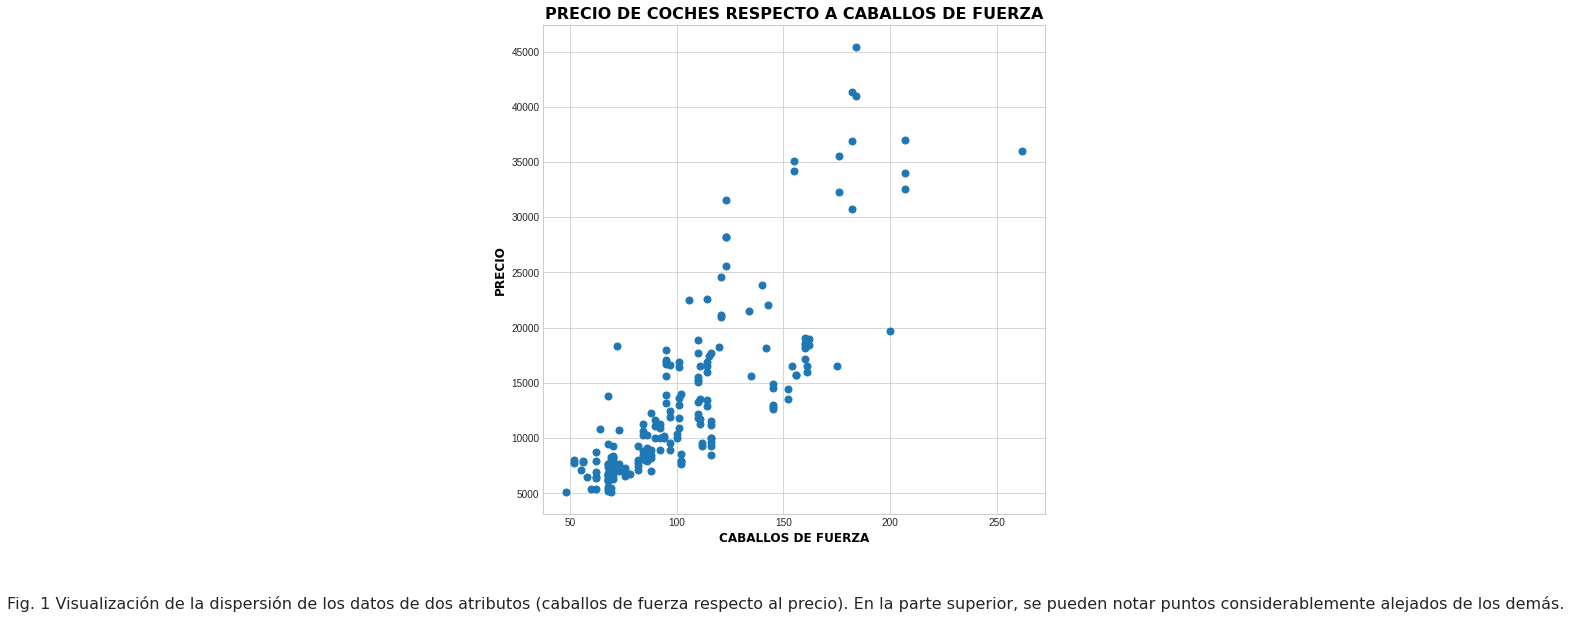

In [ ]:
#Se determinan los datos a graficar, en este caso: el precio y los caballos de fuerza de cada autom√≥vil.
x_points = dataset['Caballos_de_fuerza']
y_points = dataset['Precio']

#Se grafican.
plt.figure(figsize=(9, 9))
plt.plot(x_points, y_points, 'o',  markersize = 7) 
plt.title("PRECIO DE COCHES RESPECTO A CABALLOS DE FUERZA", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 16})
plt.suptitle("Fig. 1 Visualizaci√≥n de la dispersi√≥n de los datos de dos atributos (caballos de fuerza respecto al precio). En la parte superior, se pueden notar puntos considerablemente alejados de los dem√°s.", 
             fontproperties = {'family': 'DejaVu Sans', 'size': 16}, y=-0.001)
plt.xlabel("CABALLOS DE FUERZA", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 12})
plt.ylabel("PRECIO", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 12})
plt.show()

En la **figura 1** se observa c√≥mo hay puntos que parecen alejarse demasiado de aquellos que est√°n m√°s agrupados; estos son los datos que procederemos a eliminar, ya que se consideran **anomal√≠as** que pueden afectar la precisi√≥n de su procesamiento.

A continuaci√≥n, se eliminan los valores at√≠picos de la variable **Precio**, y se muestra la gr√°fica despu√©s de aplicar esta reducci√≥n:

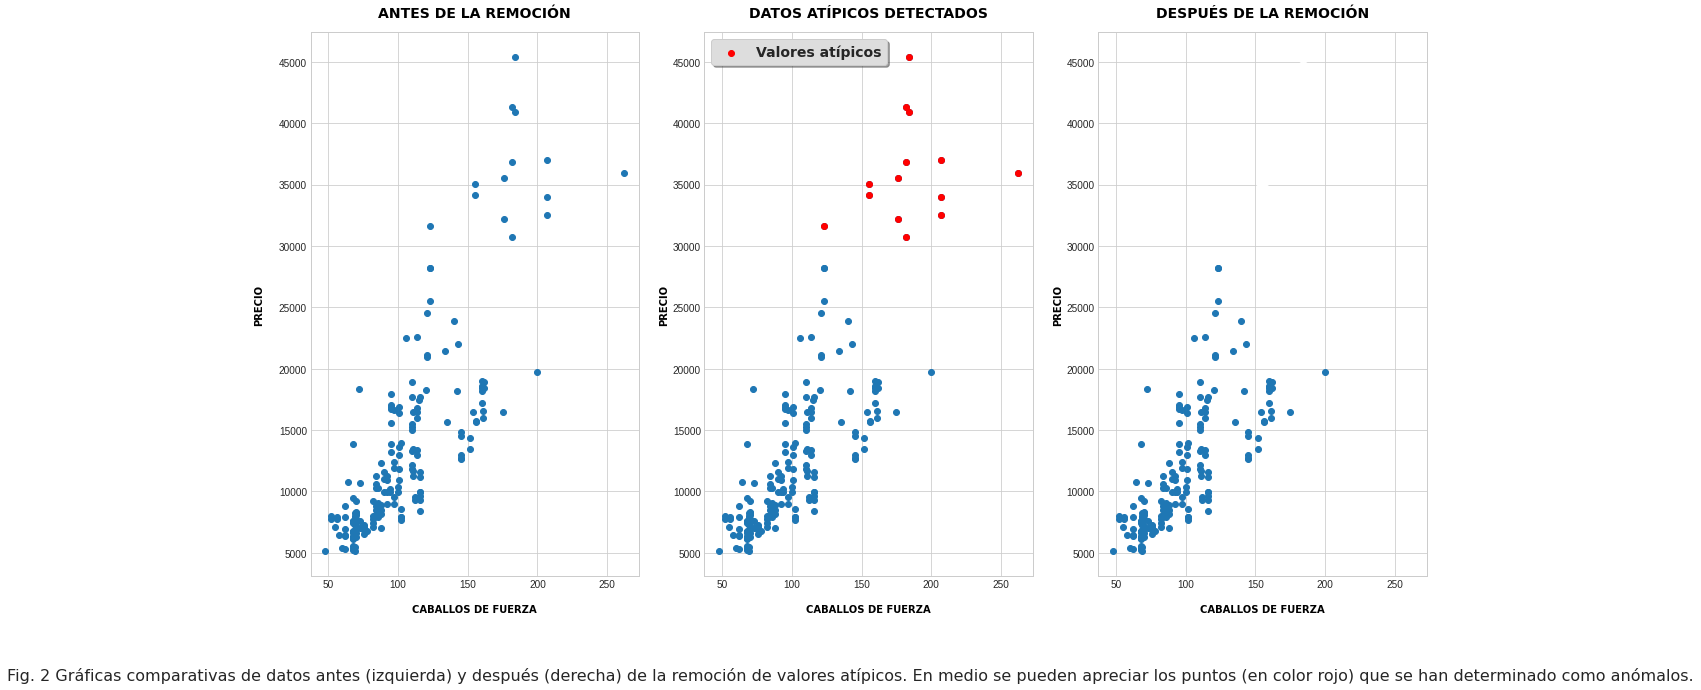

In [ ]:
#Se crea una funci√≥n que calcula los l√≠mites superior e inferior del rango intercuart√≠lico.
def iqrFilter(column):
  percentile25 = dataset[column].quantile(0.25)
  percentile75 = dataset[column].quantile(0.75)
  iqr = percentile75 - percentile25
  
  upper_limit = percentile75 + 1.5 * iqr
  lower_limit = percentile25 - 1.5 * iqr
  
  return upper_limit,lower_limit

#Se crea un conjunto de datos temporal para hacer las comparaciones.
temp_dataset = dataset

#Se realiza la detecci√≥n y eliminaci√≥n de los valores at√≠picos en los precios.
upperP,lowerP = iqrFilter('Precio')
temp_dataset = temp_dataset[dataset['Precio'] > lowerP]
temp_dataset = temp_dataset[dataset['Precio'] < upperP] 

x_points = dataset['Caballos_de_fuerza'] #Puntos del conjunto de datos original
y_points = dataset['Precio']

t_xpoints = temp_dataset['Caballos_de_fuerza'] #Puntos del conjunto de datos temporal.
t_ypoints = temp_dataset['Precio']

#Se declaran un conjunto de datos con los outliers, para la ilustraci√≥n de su detecci√≥n y elminaci√≥n.
out_dataset = pd.concat([dataset,temp_dataset]).drop_duplicates(keep=False)

o_xpoints = out_dataset['Caballos_de_fuerza'] #Puntos del conjunto de datos at√≠picos.
o_ypoints = out_dataset['Precio']

#Se despliegan las gr√°ficas.
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10), sharex=True)

ax1.plot(x_points, y_points, 'o')
ax1.set_title("ANTES DE LA REMOCI√ìN", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 14}, pad = 15)
ax1.set_xlabel("CABALLOS DE FUERZA", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 10}, labelpad=15)
ax1.set_ylabel("PRECIO", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 10}, labelpad=15) 

ax2.scatter(x_points, y_points)
ax2.scatter(o_xpoints, o_ypoints, c = 'red', label = 'Valores at√≠picos')
ax2.set_title("DATOS AT√çPICOS DETECTADOS", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 14}, pad = 15)
ax2.set_xlabel("CABALLOS DE FUERZA", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 10}, labelpad=15)
ax2.set_ylabel("PRECIO", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 10}) 
ax2.legend(loc='upper left', prop = {'family': 'DejaVu Sans', 'weight': 'bold', 'size': 14}, frameon = True, framealpha = 1, facecolor  = '#dddddd', shadow = True)

ax3.scatter(x_points, y_points)
ax3.scatter(o_xpoints, o_ypoints, s= 120, c = 'white')
ax3.set_title("DESPU√âS DE LA REMOCI√ìN", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 14}, pad = 15)
ax3.set_xlabel("CABALLOS DE FUERZA", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 10}, labelpad=15)
ax3.set_ylabel("PRECIO", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 10}) 

plt.suptitle("Fig. 2 Gr√°ficas comparativas de datos antes (izquierda) y despu√©s (derecha) de la remoci√≥n de valores at√≠picos. En medio se pueden apreciar los puntos (en color rojo) que se han determinado como an√≥malos.", 
             fontproperties = {'family': 'DejaVu Sans', 'size': 16}, y=-0.001)

plt.show()

En la **figura 2** se ilustra c√≥mo cambia la **dispersi√≥n** de los datos antes y despu√©s de la **eliminaci√≥n** de las **observaciones at√≠picas**, dando como resultado (tercera gr√°fica) puntos m√°s cercanos entre s√≠. 

Habiendo vislumbrado el objetivo de esta t√©cnica, se procede a hacer lo mismo para todas las columnas a excepci√≥n de aquellas cuyos valores no son **num√©ricos** (primeras tres columnas):

In [ ]:
#Se ejecuta la eliminaci√≥n de outliers con la funci√≥n antes definida.
for i in dataset.columns[3:].tolist():
  upperP,lowerP = iqrFilter(i)
  dataset = dataset.loc[dataset[i] > lowerP]
  dataset = dataset.loc[dataset[i] < upperP]

#Se reinicia el √≠ndice y se imprime la tabla resultante.
dataset = dataset.reset_index(drop = True)
dataset

Tipo_de_motor N√∫mero_de_cilindros Sistema_de_combustible  \
0            dohc                four                   mpfi   
1            dohc                four                   mpfi   
2            ohcv                 six                   mpfi   
3             ohc                four                   mpfi   
4             ohc                five                   mpfi   
..            ...                 ...                    ...   
170           ohc                four                   mpfi   
171           ohc                four                   mpfi   
172          ohcv                 six                   mpfi   
173           ohc                 six                    idi   
174           ohc                four                   mpfi   

     Tama√±o_del_motor  Caballos_de_fuerza   Precio  
0                 130               111.0  13495.0  
1                 130               111.0  16500.0  
2                 152               154.0  16500.0  
3                 109               102.0  13950.0  
4                 136               115.0  17450.0  
..                ...                 ...      ...  
170               141               114.0  16845.0  
171               141               160.0  19045.0  
172               173               134.0  21485.0  
173               145               106.0  22470.0  
174               141               114.0  22625.0  

[175 rows x 6 columns]

En esta √∫ltima tabla se observa un total de 175 renglones, por lo que el conjunto de datos fue reducido a una versi√≥n m√°s **estad√≠sticamente** conveniente para nuestros fines.

**Nota**: el n√∫mero de m√©todos para la detecci√≥n de outliers es extenso, y var√≠a en funci√≥n de las caracter√≠sticas de cada conjunto de datos. Entre las librer√≠as que se pueden emplear para estos fines se encuentran [PyOD](https://github.com/yzhao062/pyod), [Alibi Detect](https://github.com/SeldonIO/alibi-detect), y [PyNomaly](https://github.com/vc1492a/PyNomaly), de entre las cuales utilizaremos algunas a lo largo de las pr√°cticas del curso.

# 5. Transformaci√≥n
Como ya se ha [definido](https://dialektico.com/introduccion-preprocesamiento/#transf), la **transformaci√≥n** de los datos consiste en expresarlos en formas que posibiliten y/u optimicen su procesamiento computacional.

En esta etapa se llevar√°n a cabo las siguientes actividades:



*   Codificaci√≥n de datos cualitativos a tipo cuantitativo.
*   Escalado de datos.

A continuaci√≥n, se desglosan sus razones y m√©todos.

## 5.1 Codificaci√≥n de datos cualitativos

Para aclarar el por qu√© de este primer paso, revisemos c√≥mo ha quedado la informaci√≥n de nuestro conjunto de datos despu√©s de la primera etapa de preprocesamiento:


In [ ]:
#Se despliega la informaci√≥n general del conjunto de datos.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Tipo_de_motor           175 non-null    object 
 1   N√∫mero_de_cilindros     175 non-null    object 
 2   Sistema_de_combustible  175 non-null    object 
 3   Tama√±o_del_motor        175 non-null    int64  
 4   Caballos_de_fuerza      175 non-null    float64
 5   Precio                  175 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 8.3+ KB


Se puede notar que los valores nulos han desaparecido, adem√°s de haber disminuido el n√∫mero de **atributos**, cambiado sus nombres, y reducido el n√∫mero de ejemplos de entrenamiento.  

Ahora dirijamos nuestra atenci√≥n a la secci√≥n con el t√≠tulo "**Dtype**", la cual nos muestra el tipo de datos que contiene cada columna; en esta notaremos algunos valores de tipo **enteros** (int64) o **racionales** (float64), es decir, de tipo cuantitativo; sin embargo, tambi√©n notaremos algunas columnas con valores **[cualitativos](https://dialektico.com/datos-machine-learning/#Dcualit)**, como la correspondiente al **Tipo de motor**.

Dado que en nuestros **objetivos** se ha establecido que estos datos se utilizar√°n como **entradas** para un modelo de **aprendizaje autom√°tico**, los datos de todo el conjunto deber√°n ser de **tipo num√©rico**, por lo que procederemos a transformar todos los datos cualitativos en representaciones matem√°ticas de los mismos.



Para llevar a cabo esta transformaci√≥n utilizaremos la librer√≠a **[Sklearn](https://scikit-learn.org/stable/index.html)** y su clase **[LabelEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)**, la cual asignar√° un n√∫mero entero a cada uno de los posibles valores de la columna.

**Nota:** utilizaremos esta t√©cnica para mantener la sencillez de la experiencia del preprocesamiento, mas no significa que sea la mejor opci√≥n entre todo el espectro de posibilidades. La forma de generar representaciones num√©ricas para cada variable depender√° de factores asociados al modelo del cual ser√°n entradas.

Observemos c√≥mo se aplica esto a la caracter√≠stica "**Tipo_de_motor**".

Partiremos observando cu√°les son los diferentes **valores** de este atributo:

In [ ]:
#Se imprimen los distintos valores de la columna Tipo_de_motor, y el n√∫mero de veces que aparece cada uno.
dataset['Tipo_de_motor'].value_counts()

ohc      131
l         12
ohcf      12
dohc      10
ohcv       6
rotor      4
Name: Tipo_de_motor, dtype: int64

En la primer columna se observa el valor que puede tomar el **atributo**, y en la segunda columna el **n√∫mero de veces** que aparece cada uno. Por ejemplo, hay 131 renglones o ejemplos de entrenamiento en los que aparece "ohc" como valor del **tipo de motor**.

Sabiendo que existen 6 posibles valores, procedemos a codificarlos num√©ricamente:

In [ ]:
#Se declara el codificador.
le = preprocessing.LabelEncoder()

#Se transforman los valores de la columna en enteros.
dataset['Tipo_de_motor'] = le.fit_transform(dataset['Tipo_de_motor'])

#Se imprime el conjunto de datos.
dataset

Tipo_de_motor N√∫mero_de_cilindros Sistema_de_combustible  \
0                0                four                   mpfi   
1                0                four                   mpfi   
2                4                 six                   mpfi   
3                2                four                   mpfi   
4                2                five                   mpfi   
..             ...                 ...                    ...   
170              2                four                   mpfi   
171              2                four                   mpfi   
172              4                 six                   mpfi   
173              2                 six                    idi   
174              2                four                   mpfi   

     Tama√±o_del_motor  Caballos_de_fuerza   Precio  
0                 130               111.0  13495.0  
1                 130               111.0  16500.0  
2                 152               154.0  16500.0  
3                 109               102.0  13950.0  
4                 136               115.0  17450.0  
..                ...                 ...      ...  
170               141               114.0  16845.0  
171               141               160.0  19045.0  
172               173               134.0  21485.0  
173               145               106.0  22470.0  
174               141               114.0  22625.0  

[175 rows x 6 columns]

En la tabla se puede constatar que ahora los valores para la variable "Tipo_de_motor" son **num√©ricos**: enteros que se han asignado a cada posible dato cualitativo. 

La transformaci√≥n se dio de la siguiente forma:


*   **dohc** = 0
*   **l** = 1
*   **ohc** = 2
*   **ohcf** = 3
*   **ohcv** = 4
*   **rotor** = 5



Despu√©s de ver c√≥mo se da esta transformaci√≥n, procedemos a aplicar la misma a las dem√°s columnas con datos de tipo cualitativo:

In [ ]:
#Se aplica el codificador a cada columna con valores no num√©ricos.
dataset['N√∫mero_de_cilindros'] = le.fit_transform(dataset['N√∫mero_de_cilindros'])
dataset['Sistema_de_combustible'] = le.fit_transform(dataset['Sistema_de_combustible'])

#Se imprime el conjunto de datos.
dataset

Tipo_de_motor  N√∫mero_de_cilindros  Sistema_de_combustible  \
0                0                    1                       5   
1                0                    1                       5   
2                4                    2                       5   
3                2                    1                       5   
4                2                    0                       5   
..             ...                  ...                     ...   
170              2                    1                       5   
171              2                    1                       5   
172              4                    2                       5   
173              2                    2                       3   
174              2                    1                       5   

     Tama√±o_del_motor  Caballos_de_fuerza   Precio  
0                 130               111.0  13495.0  
1                 130               111.0  16500.0  
2                 152               154.0  16500.0  
3                 109               102.0  13950.0  
4                 136               115.0  17450.0  
..                ...                 ...      ...  
170               141               114.0  16845.0  
171               141               160.0  19045.0  
172               173               134.0  21485.0  
173               145               106.0  22470.0  
174               141               114.0  22625.0  

[175 rows x 6 columns]

El resultado es un conjunto de datos con todos sus valores de tipo **num√©ricos**.

**Nota:** como ya he manifestado, existen diversos m√©todos para la codificaci√≥n de valores que describen cualidades de los objetos que componen un conjunto de datos, entre los cuales est√°n, por ejemplo, la creaci√≥n de **embbedings**, que juegan un papel sumamente importante en algunas ramas de la ciencia de datos. Esto lo veremos en pr√≥ximas aventuras, por lo pronto, se puede consultar [este art√≠culo](https://elmundodelosdatos.com/tecnicas-para-codificar-variables-categoricas-ordinal-one-hot/) para m√°s informaci√≥n al respecto.

## 5.2 Escalado de datos

Ahora que tenemos valores completamente num√©ricos, procedemos a explorarlos de otra forma: desplegando estad√≠sticas b√°sicas utilizando la funci√≥n **describe()** de Pandas, la cual nos mostrar√° la siguiente informaci√≥n de los valores de cada columna:



*   **Count**: n√∫mero de valores de cada columna.
*   **Mean**: su promedio.
*   **Std**: su desviaci√≥n est√°ndar.
*   **Min**: su valor m√≠nimo.
*   **Max**: su valor m√°ximo.
*   **25%, 50%, 75%**: sus percentiles


In [ ]:
#Desplegamos las estad√≠sticas del conjunto de datos.
dataset.describe()

Tipo_de_motor  N√∫mero_de_cilindros  Sistema_de_combustible  \
count     175.000000           175.000000              175.000000   
mean        2.022857             1.120000                3.148571   
std         0.843871             0.579734                2.031557   
min         0.000000             0.000000                0.000000   
25%         2.000000             1.000000                1.000000   
50%         2.000000             1.000000                3.000000   
75%         2.000000             1.000000                5.000000   
max         5.000000             4.000000                7.000000   

       Tama√±o_del_motor  Caballos_de_fuerza        Precio  
count        175.000000          175.000000    175.000000  
mean         117.725714           96.640000  11418.822857  
std           25.673999           29.237663   4708.804425  
min           61.000000           48.000000   5118.000000  
25%           97.000000           70.000000   7713.500000  
50%          110.000000           92.000000   9988.000000  
75%          136.000000          114.000000  15145.000000  
max          183.000000          175.000000  25552.000000

Sin contar los datos de aquellas variables que transformamos en el paso anterior, ya que sus valores son poco diversos y todos **discretos**, se pueden discernir cantidades **m√°ximas** y **m√≠nimas** muy distantes entre s√≠ (en un rango de 48 a 25,552).

Dato que estos datos fungir√°n como **entradas** para un **algoritmo** de machine learning, lo recomendable es **escalar** los datos (hacer m√°s peque√±as las distancias entre las observaciones coloc√°ndolos en un intervalo) para eficientar su **procesamiento**.

Para esto recurriremos a la clase **[MinMaxScaler()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)** de Sklearn, la cual escalar√° los datos a un intervalo de 0 a 1:

In [ ]:
#Se declara la clase que escalar√° nuestros datos.
scaler = preprocessing.MinMaxScaler()

#Se escalan los datos a un intervalo entre 0 y 1.
normalized = scaler.fit_transform(dataset)

#Se toman los valores de las columnas y se recrea la tabla con los datos escalados.
column_names = dataset.columns
dataset = pd.DataFrame(normalized, columns = column_names)

#Se imprime el conjunto de datos.
dataset

Tipo_de_motor  N√∫mero_de_cilindros  Sistema_de_combustible  \
0              0.0                 0.25                0.714286   
1              0.0                 0.25                0.714286   
2              0.8                 0.50                0.714286   
3              0.4                 0.25                0.714286   
4              0.4                 0.00                0.714286   
..             ...                  ...                     ...   
170            0.4                 0.25                0.714286   
171            0.4                 0.25                0.714286   
172            0.8                 0.50                0.714286   
173            0.4                 0.50                0.428571   
174            0.4                 0.25                0.714286   

     Tama√±o_del_motor  Caballos_de_fuerza    Precio  
0            0.565574            0.496063  0.409954  
1            0.565574            0.496063  0.557013  
2            0.745902            0.834646  0.557013  
3            0.393443            0.425197  0.432221  
4            0.614754            0.527559  0.603504  
..                ...                 ...       ...  
170          0.655738            0.519685  0.573896  
171          0.655738            0.881890  0.681560  
172          0.918033            0.677165  0.800969  
173          0.688525            0.456693  0.849173  
174          0.655738            0.519685  0.856758  

[175 rows x 6 columns]

Como podr√°s notar, el resultado es el conjunto de datos con los n√∫meros escalados entre los valores 0 y 1, lo cual minimiza las distancias y procura un mayor **rendimiento** de procesamiento.

# 7. Resultados
Hemos terminado nuestro preprocesamiento. Ahora que se ha aplicado limpieza y transformaci√≥n a nuestros datos, podemos visualizar el antes y el despu√©s de estas etapas: 

**Conjunto de datos inicial:**

In [ ]:
orig_dataset = pd.read_csv('https://raw.githubusercontent.com/DanielDialektico/Machine-Learning/main/Regresi%C3%B3n%20Lineal/Autom%C3%B3viles.csv')
orig_dataset

symboling  normalized-losses         make  fuel-type aspiration  \
0            3                NaN  alfa-romero        gas        std   
1            3                NaN  alfa-romero        gas        std   
2            1                NaN  alfa-romero        gas        std   
3            2              164.0         audi        gas        std   
4            2              164.0         audi        gas        std   
..         ...                ...          ...        ...        ...   
200         -1               95.0        volvo        gas        std   
201         -1               95.0        volvo        gas      turbo   
202         -1               95.0        volvo        gas        std   
203         -1               95.0        volvo     diesel      turbo   
204         -1               95.0        volvo        gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  \
0            two  convertible          rwd           front        88.6   
1            two  convertible          rwd           front        88.6   
2            two    hatchback          rwd           front        94.5   
3           four        sedan          fwd           front        99.8   
4           four        sedan          4wd           front        99.4   
..           ...          ...          ...             ...         ...   
200         four        sedan          rwd           front       109.1   
201         four        sedan          rwd           front       109.1   
202         four        sedan          rwd           front       109.1   
203         four        sedan          rwd           front       109.1   
204         four        sedan          rwd           front       109.1   

     length  width  height  curb-weight engine-type num-of-cylinders  \
0     168.8   64.1    48.8         2548        dohc             four   
1     168.8   64.1    48.8         2548        dohc             four   
2     171.2   65.5    52.4         2823        ohcv              six   
3     176.6   66.2    54.3         2337         ohc             four   
4     176.6   66.4    54.3         2824         ohc             five   
..      ...    ...     ...          ...         ...              ...   
200   188.8   68.9    55.5         2952         ohc             four   
201   188.8   68.8    55.5         3049         ohc             four   
202   188.8   68.9    55.5         3012        ohcv              six   
203   188.8   68.9    55.5         3217         ohc              six   
204   188.8   68.9    55.5         3062         ohc             four   

     engine-size fuel-system  bore  stroke  compression-ratio  horsepower  \
0            130        mpfi  3.47    2.68                9.0       111.0   
1            130        mpfi  3.47    2.68                9.0       111.0   
2            152        mpfi  2.68    3.47                9.0       154.0   
3            109        mpfi  3.19    3.40               10.0       102.0   
4            136        mpfi  3.19    3.40                8.0       115.0   
..           ...         ...   ...     ...                ...         ...   
200          141        mpfi  3.78    3.15                9.5       114.0   
201          141        mpfi  3.78    3.15                8.7       160.0   
202          173        mpfi  3.58    2.87                8.8       134.0   
203          145         idi  3.01    3.40               23.0       106.0   
204          141        mpfi  3.78    3.15                9.5       114.0   

     peak-rpm  city-mpg  highway-mpg    price  
0      5000.0        21           27  13495.0  
1      5000.0        21           27  16500.0  
2      5000.0        19           26  16500.0  
3      5500.0        24           30  13950.0  
4      5500.0        18           22  17450.0  
..        ...       ...          ...      ...  
200    5400.0        23           28  16845.0  
201    5300.0        19           25  19045.0  
202    5500.0        18      

**Conjunto de datos preprocesado:**

In [ ]:
dataset

Tipo_de_motor  N√∫mero_de_cilindros  Sistema_de_combustible  \
0              0.0                 0.25                0.714286   
1              0.0                 0.25                0.714286   
2              0.8                 0.50                0.714286   
3              0.4                 0.25                0.714286   
4              0.4                 0.00                0.714286   
..             ...                  ...                     ...   
170            0.4                 0.25                0.714286   
171            0.4                 0.25                0.714286   
172            0.8                 0.50                0.714286   
173            0.4                 0.50                0.428571   
174            0.4                 0.25                0.714286   

     Tama√±o_del_motor  Caballos_de_fuerza    Precio  
0            0.565574            0.496063  0.409954  
1            0.565574            0.496063  0.557013  
2            0.745902            0.834646  0.557013  
3            0.393443            0.425197  0.432221  
4            0.614754            0.527559  0.603504  
..                ...                 ...       ...  
170          0.655738            0.519685  0.573896  
171          0.655738            0.881890  0.681560  
172          0.918033            0.677165  0.800969  
173          0.688525            0.456693  0.849173  
174          0.655738            0.519685  0.856758  

[175 rows x 6 columns]

Notar√°s que el conjunto de datos cambi√≥ considerablemente en cuanto a su **estructura** y **contenido**, y aunque podr√≠an hacerse m√°s adecuaciones dependiendo del objetivo fijado, este ahora est√° m√°s **optimizado** para alimentar un modelo de machine learning con los atributos solicitados.

As√≠ concluye nuestra primera **pr√°ctica** en Python, el fin de este breve encuentro fue el de mostrar qu√© tipo de cambios se pueden llegar a necesitar suscitar en los datos para un eficiente procesamiento. 

El preprocesamiento es una actividad casi inexorable en la creaci√≥n de **modelos** de **aprendizaje de m√°quinas**, por lo que se ir√° practicando como una etapa inicial en la mayor√≠a de los algoritmos abordados en el curso.

‚ñ∂ [Regresar a la lecci√≥n](https://dialektico.com/introduccion-preprocesamiento/#c%C3%B3digo) üßô

# 8. Ap√©ndice

## 8.1 Sobre el conjunto de datos
El conjunto de datos utilizado en este ejercicio fue obtenido del Repositorio de Aprendizaje de M√°quinas UCI del Centro para Machine Learning e Inteligencia Artificial de la Universidad de California.

Estos datos fueron recolectados por Jeffrey C. Schlimmer (Jeffrey.Schlimmer '@' a.gp.cs.cmu.edu), de las siguientes fuentes:

*   1985 Model Import Car and Truck Specifications, 1985 Ward's Automotive Yearbook.
*   Personal Auto Manuals, Insurance Services Office, 160 Water Street, New York, NY 10038.
*Insurance Collision Report, Insurance Institute for Highway Safety, Watergate 600, Washington, DC 20037.

**Atributos y sus rangos**:
1. **symboling**: -3, -2, -1, 0, 1, 2, 3.
2. **normalized-losses**: continuo de 65 a 256.
3. **make**:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. **fuel-type**: diesel, gasolina.
5. **aspiration**: std, turbo.
6. **num-of-doors**: cuatro, dos.
7. **body-style**:: techo duro, wagon, sed√°n, hatchback, descapotable.
8. **drive-wheels**: 4x4, fwd, rwd.
9. **engine-location**: delantero, trasero.
10. **wheel-base**: continua de 86.6 a 120.9.
11. **lenght**: continua de 141.1 a 208.1.
12. **width**: continua de 60.3 a 72.3.
13. **height**: continua de 47.8 a 59.8.
14. **curb-weigh**: continuo de 1488 a 4066.
15. **engine-type**: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. **num-of-cylinders**: ocho, cinco, cuatro, seis, tres, doce, dos.
17. **engine-size**: continuo de 61 a 326.
18. **fuel-system**: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. **bore**: continuo de 2.54 a 3.94.
20. **stroke**: continua de 2.07 a 4.17.
21. **compression-ratio**: continua de 7 a 23.
22. **horsepower**: continua de 48 a 288.
23. **peak-rpm**: continua de 4.150 a 6.600 rpm.
24. **city-mpg**: continuo de 13 a 49.
25. **highway-mpg**: continuo de 16 a 54.

In [ ]:
# MIT License
#
# Copyright (c) 2023 Daniel Garc√≠a
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.